In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Análise Exploratória e Processamento de Dados

À medida que eu fui desenvolvendo o estudo, percebi que para mim faz mais sentido realizar a análise e o seu processamento. Portanto, a análise exploratória e o processamento de dados estão sendo desenvolvidos em conjunto.

## Contato inicial com o dataset

A ideia é apenas obter uma visão rápida e geral do que se trata o dataset e possível correções que eu posso aplicar

In [2]:
df = pd.read_csv('./data/cars.csv')

In [3]:
df

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
0,Acura,ILX Hybrid 1.5L,2013,92945.0,"1.5L I-4 i-VTEC variable valve control, engine...",Automatic,Front-wheel Drive,Gasoline,39-38,Black,Parchment,0.0,0.0,0.0,Iconic Coach,NaN,4.4,12.0,300.0,13988.0
1,Acura,ILX Hybrid 1.5L,2013,47645.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Gray,Ebony,1.0,1.0,1.0,Kars Today,NaN,4.4,12.0,NaN,17995.0
2,Acura,ILX Hybrid 1.5L,2013,53422.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Bellanova White Pearl,Ebony,0.0,1.0,1.0,Weiss Toyota of South County,4.3,4.4,12.0,500.0,17000.0
3,Acura,ILX Hybrid 1.5L,2013,117598.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Polished Metal Metallic,NaN,0.0,1.0,1.0,Apple Tree Acura,NaN,4.4,12.0,675.0,14958.0
4,Acura,ILX Hybrid 1.5L,2013,114865.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,NaN,Ebony,1.0,0.0,1.0,Herb Connolly Chevrolet,3.7,4.4,12.0,300.0,14498.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762086,Volvo,S60 B5 Momentum,2022,22877.0,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,All-wheel Drive,Gasoline,25-33,Bright Silver Metallic,Blond,0.0,1.0,0.0,Volvo Cars Danbury,4.2,4.2,2.0,250.0,34798.0
762087,Volvo,S60 T5,2012,72900.0,250.0HP 2.5L 5 Cylinder Engine Gasoline Fuel,A/T,Front-wheel Drive,Gasoline,NaN,Red,Beige,NaN,NaN,NaN,NaN,NaN,4.5,101.0,NaN,12500.0
762088,Volvo,S60 T5,2014,92000.0,2.5L I5 20V MPFI DOHC Turbo,6-Speed Automatic,Front-wheel Drive,Gasoline,21-30,Ice White,Soft Beige,0.0,0.0,1.0,Dapper Car Sales,NaN,4.8,36.0,300.0,12299.0
762089,Volvo,S60 T5 Platinum,2013,132000.0,2.5L I5 20V MPFI DOHC Turbo,6-Speed Automatic,All-wheel Drive,Gasoline,20-29,Ice White,Off Black,1.0,0.0,0.0,Legend Auto Sales Inc.,4.6,4.7,62.0,1000.0,8995.0


In [4]:
df.shape

(762091, 20)

In [5]:
df.dtypes

manufacturer            object
model                   object
year                     int64
mileage                float64
engine                  object
transmission            object
drivetrain              object
fuel_type               object
mpg                     object
exterior_color          object
interior_color          object
accidents_or_damage    float64
one_owner              float64
personal_use_only      float64
seller_name             object
seller_rating          float64
driver_rating          float64
driver_reviews_num     float64
price_drop             float64
price                  float64
dtype: object

In [6]:
df.isnull().sum()

manufacturer                0
model                       0
year                        0
mileage                   506
engine                  15050
transmission             9904
drivetrain              21562
fuel_type               22927
mpg                    142071
exterior_color           8859
interior_color          56975
accidents_or_damage     24212
one_owner               31483
personal_use_only       24852
seller_name              8593
seller_rating          213973
driver_rating           31632
driver_reviews_num          0
price_drop             351979
price                       0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(9145)

Valores muito discrepantes de máximo e mínimo para price

In [8]:
df['price'].min()

np.float64(1.0)

In [9]:
df['price'].max()

np.float64(1000000000.0)

## Gerando a amostra aleatória

Geração de uma amostra **repordutível simples** e já tratando suas duplicatas

Garantindo que a amostra seja **reprodutível** rodando a célula abaixo

In [10]:
np.random.seed(33)

Eu escolhi gerar uma **amostra aleatória simples** de 25% do dataset

In [11]:
sample = df.sample(frac=0.25)
sample

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
191809,Ford,Focus S,2018,94746.0,2.0L I4 16V GDI DOHC Flexible Fuel,6-Speed Automatic with Auto-Shift,Front-wheel Drive,E85 Flex Fuel,25-34,Shadow Black,Charcoal Black,0.0,1.0,1.0,Blasius Pre-Owned Auto,4.3,4.6,202.0,590.0,10994.0
488330,Lincoln,MKZ Base,2014,55710.0,2.0L I4 16V GDI DOHC Turbo,6-Speed Automatic,Front-wheel Drive,Gasoline,22-33,White Platinum Tri-Coat Metallic,Charcoal Black,0.0,0.0,1.0,Maxkar Motors,3.8,4.7,69.0,500.0,17498.0
713389,Toyota,RAV4 Hybrid Limited,2022,15022.0,2.5L,Continuously Variable Transmission,NaN,B,NaN,SILVER SKY METALLIC,EA20,0.0,1.0,1.0,Charlie's Toyota,NaN,4.8,13.0,NaN,42995.0
531766,Mercedes-Benz,C-Class C300 4MATIC,2014,78600.0,Premium Unleaded V-6 3.5 L/213,Automatic,All-wheel Drive,Gasoline,20-27,Black,Black,0.0,0.0,0.0,Mercedes-Benz of Lynnwood,4.4,4.7,100.0,505.0,17995.0
216502,Ford,F-250 Platinum,2017,70365.0,6.7L V8 32V DDI OHV Turbo Diesel,6-Speed Automatic,Four-wheel Drive,Diesel,NaN,Magnetic Metallic,Black,0.0,1.0,1.0,Grapevine Ford Lincoln,4.6,4.6,163.0,NaN,63999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489863,Lincoln,Corsair Standard,2021,22369.0,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,All-wheel Drive,Gasoline,21-29,Burgundy Velvet,Sandstone,0.0,1.0,0.0,Zeck Ford,4.9,4.8,9.0,500.0,32000.0
513217,Mercedes-Benz,GLC 300 Base 4MATIC,2020,51915.0,2.0L I4 16V GDI DOHC Turbo,9-Speed Automatic,All-wheel Drive,Gasoline,21-28,Polar White,Black,0.0,1.0,1.0,Mercedes-Benz of Massapequa,4.8,4.8,36.0,NaN,32217.0
59014,BMW,X3,2021,41279.0,NaN,AUTOMATIC,NaN,NaN,NaN,Glacier Silver Metallic,NaN,0.0,0.0,0.0,BMW of Cincinnati North,NaN,4.7,29.0,NaN,40000.0
314423,Honda,HR-V LX,2021,16722.0,1.8L I4 16V MPFI SOHC,Automatic CVT,All-wheel Drive,Gasoline,27-31,Silver,Gray,1.0,1.0,1.0,West Herr Honda of Canandaigua,4.5,4.7,45.0,253.0,23892.0


In [12]:
sample.nunique()

manufacturer              30
model                   7992
year                      93
mileage                99257
engine                  3903
transmission             684
drivetrain                25
fuel_type                 23
mpg                      635
exterior_color          4675
interior_color          2663
accidents_or_damage        2
one_owner                  2
personal_use_only          2
seller_name            16936
seller_rating             41
driver_rating             30
driver_reviews_num       369
price_drop              4508
price                  36393
dtype: int64

In [13]:
sample.duplicated().sum()

np.int64(553)

Removendo as **duplicatas** da amostra

In [14]:
sample = sample.drop_duplicates()

## Tratando valores nulos das variáveis

Tratei os valores nulos do dataframe de forma que as variáveis **categóricas** fossem substituídas pela string **'Not Informed'** e as variáveis **númericas** pela **Moda** e **Mediana**

In [15]:
sample.dtypes

manufacturer            object
model                   object
year                     int64
mileage                float64
engine                  object
transmission            object
drivetrain              object
fuel_type               object
mpg                     object
exterior_color          object
interior_color          object
accidents_or_damage    float64
one_owner              float64
personal_use_only      float64
seller_name             object
seller_rating          float64
driver_rating          float64
driver_reviews_num     float64
price_drop             float64
price                  float64
dtype: object

In [16]:
sample.isnull().sum()

manufacturer               0
model                      0
year                       0
mileage                  129
engine                  3699
transmission            2428
drivetrain              5365
fuel_type               5708
mpg                    35549
exterior_color          2224
interior_color         14182
accidents_or_damage     6098
one_owner               7941
personal_use_only       6275
seller_name             2188
seller_rating          53368
driver_rating           8014
driver_reviews_num         0
price_drop             87577
price                      0
dtype: int64

### Variáveis categóricas

In [17]:
object_sample_vars = sample[['engine', 'transmission', 'drivetrain', 'fuel_type', 'mpg', 'exterior_color', 'interior_color', 'seller_name']]
object_sample_vars

,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,seller_name
191809,2.0L I4 16V GDI DOHC Flexible Fuel,6-Speed Automatic with Auto-Shift,Front-wheel Drive,E85 Flex Fuel,25-34,Shadow Black,Charcoal Black,Blasius Pre-Owned Auto
488330,2.0L I4 16V GDI DOHC Turbo,6-Speed Automatic,Front-wheel Drive,Gasoline,22-33,White Platinum Tri-Coat Metallic,Charcoal Black,Maxkar Motors
713389,2.5L,Continuously Variable Transmission,NaN,B,NaN,SILVER SKY METALLIC,EA20,Charlie's Toyota
531766,Premium Unleaded V-6 3.5 L/213,Automatic,All-wheel Drive,Gasoline,20-27,Black,Black,Mercedes-Benz of Lynnwood
216502,6.7L V8 32V DDI OHV Turbo Diesel,6-Speed Automatic,Four-wheel Drive,Diesel,NaN,Magnetic Metallic,Black,Grapevine Ford Lincoln
...,...,...,...,...,...,...,...,...
489863,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,All-wheel Drive,Gasoline,21-29,Burgundy Velvet,Sandstone,Zeck Ford
513217,2.0L I4 16V GDI DOHC Turbo,9-Speed Automatic,All-wheel Drive,Gasoline,21-28,Polar White,Black,Mercedes-Benz of Massapequa
59014,NaN,AUTOMATIC,NaN,NaN,NaN,Glacier Silver Metallic,NaN,BMW of Cincinnati North
314423,1.8L I4 16V MPFI SOHC,Automatic CVT,All-wheel Drive,Gasoline,27-31,Silver,Gray,West Herr Honda of Canandaigua


Preenchendo valores faltantes das colunas categóricas com **'Not Informed'**

In [18]:
sample = sample.copy()

for col_name in object_sample_vars:
    sample.loc[:, col_name] = sample[col_name].fillna('Not Informed')

### Variáveis numéricas

Com base em características das variáveis, separei algumas para serem preenchidas pela **moda** e outras pela **mediana**

'accidents_or_damage', 'one_owner' e 'personal_use_only' foram substituídas pela moda por possuírem apenas valores 0 e 1.<br>
'mileage','seller_rating', 'driver_rating' e 'price_drop' foram substituídas pela mediana por possuírem valores diversos.

In [19]:
mode_numeric_sample_vars = sample[['accidents_or_damage', 'one_owner', 'personal_use_only']]
median_numeric_sample_vars = sample[['mileage','seller_rating', 'driver_rating', 'price_drop']]

In [20]:
mode_numeric_sample_vars

,accidents_or_damage,one_owner,personal_use_only
191809,0.0,1.0,1.0
488330,0.0,0.0,1.0
713389,0.0,1.0,1.0
531766,0.0,0.0,0.0
216502,0.0,1.0,1.0
...,...,...,...
489863,0.0,1.0,0.0
513217,0.0,1.0,1.0
59014,0.0,0.0,0.0
314423,1.0,1.0,1.0


In [21]:
median_numeric_sample_vars

,mileage,seller_rating,driver_rating,price_drop
191809,94746.0,4.3,4.6,590.0
488330,55710.0,3.8,4.7,500.0
713389,15022.0,NaN,4.8,NaN
531766,78600.0,4.4,4.7,505.0
216502,70365.0,4.6,4.6,NaN
...,...,...,...,...
489863,22369.0,4.9,4.8,500.0
513217,51915.0,4.8,4.8,NaN
59014,41279.0,NaN,4.7,NaN
314423,16722.0,4.5,4.7,253.0


Preenchendo valores faltantes de colunas numéricas com a **moda**

In [22]:
for col_name in mode_numeric_sample_vars:
    mode = sample[col_name].mode()[0]
    sample.loc[:, col_name] = sample[col_name].fillna(mode)

Preenchendo valores faltantes de colunas numéricas com a **mediana**

In [23]:
for col_name in median_numeric_sample_vars:
    median = sample[col_name].median()
    sample.loc[:, col_name] = sample[col_name].fillna(median)

Nenhum registro nulo em nossa sample

In [24]:
sample.isnull().sum()

manufacturer           0
model                  0
year                   0
mileage                0
engine                 0
transmission           0
drivetrain             0
fuel_type              0
mpg                    0
exterior_color         0
interior_color         0
accidents_or_damage    0
one_owner              0
personal_use_only      0
seller_name            0
seller_rating          0
driver_rating          0
driver_reviews_num     0
price_drop             0
price                  0
dtype: int64

In [25]:
sample

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
191809,Ford,Focus S,2018,94746.0,2.0L I4 16V GDI DOHC Flexible Fuel,6-Speed Automatic with Auto-Shift,Front-wheel Drive,E85 Flex Fuel,25-34,Shadow Black,Charcoal Black,0.0,1.0,1.0,Blasius Pre-Owned Auto,4.3,4.6,202.0,590.0,10994.0
488330,Lincoln,MKZ Base,2014,55710.0,2.0L I4 16V GDI DOHC Turbo,6-Speed Automatic,Front-wheel Drive,Gasoline,22-33,White Platinum Tri-Coat Metallic,Charcoal Black,0.0,0.0,1.0,Maxkar Motors,3.8,4.7,69.0,500.0,17498.0
713389,Toyota,RAV4 Hybrid Limited,2022,15022.0,2.5L,Continuously Variable Transmission,Not Informed,B,Not Informed,SILVER SKY METALLIC,EA20,0.0,1.0,1.0,Charlie's Toyota,4.5,4.8,13.0,644.0,42995.0
531766,Mercedes-Benz,C-Class C300 4MATIC,2014,78600.0,Premium Unleaded V-6 3.5 L/213,Automatic,All-wheel Drive,Gasoline,20-27,Black,Black,0.0,0.0,0.0,Mercedes-Benz of Lynnwood,4.4,4.7,100.0,505.0,17995.0
216502,Ford,F-250 Platinum,2017,70365.0,6.7L V8 32V DDI OHV Turbo Diesel,6-Speed Automatic,Four-wheel Drive,Diesel,Not Informed,Magnetic Metallic,Black,0.0,1.0,1.0,Grapevine Ford Lincoln,4.6,4.6,163.0,644.0,63999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489863,Lincoln,Corsair Standard,2021,22369.0,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,All-wheel Drive,Gasoline,21-29,Burgundy Velvet,Sandstone,0.0,1.0,0.0,Zeck Ford,4.9,4.8,9.0,500.0,32000.0
513217,Mercedes-Benz,GLC 300 Base 4MATIC,2020,51915.0,2.0L I4 16V GDI DOHC Turbo,9-Speed Automatic,All-wheel Drive,Gasoline,21-28,Polar White,Black,0.0,1.0,1.0,Mercedes-Benz of Massapequa,4.8,4.8,36.0,644.0,32217.0
59014,BMW,X3,2021,41279.0,Not Informed,AUTOMATIC,Not Informed,Not Informed,Not Informed,Glacier Silver Metallic,Not Informed,0.0,0.0,0.0,BMW of Cincinnati North,4.5,4.7,29.0,644.0,40000.0
314423,Honda,HR-V LX,2021,16722.0,1.8L I4 16V MPFI SOHC,Automatic CVT,All-wheel Drive,Gasoline,27-31,Silver,Gray,1.0,1.0,1.0,West Herr Honda of Canandaigua,4.5,4.7,45.0,253.0,23892.0



Para melhor entendimento do dataset, foram selecionadas algumas variáveis que proveram insights sobre as variáveis e possíveis limpezas/análises a se fazer

## Análise de variáveis

### Quais variáveis são numéricas?

Definição das variáveis numéricas da sample

Em primeira mão, é possível visualizar que as variáveis numéricas são aquelas são do tipo **int64** ou **float64**

In [26]:
numerical_columns = sample.select_dtypes(include='number').dtypes
print('Variáveis numéricas:')
print(numerical_columns)

Variáveis numéricas:
year                     int64
mileage                float64
accidents_or_damage    float64
one_owner              float64
personal_use_only      float64
seller_rating          float64
driver_rating          float64
driver_reviews_num     float64
price_drop             float64
price                  float64
dtype: object


In [27]:
sample.head()

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
191809,Ford,Focus S,2018,94746.0,2.0L I4 16V GDI DOHC Flexible Fuel,6-Speed Automatic with Auto-Shift,Front-wheel Drive,E85 Flex Fuel,25-34,Shadow Black,Charcoal Black,0.0,1.0,1.0,Blasius Pre-Owned Auto,4.3,4.6,202.0,590.0,10994.0
488330,Lincoln,MKZ Base,2014,55710.0,2.0L I4 16V GDI DOHC Turbo,6-Speed Automatic,Front-wheel Drive,Gasoline,22-33,White Platinum Tri-Coat Metallic,Charcoal Black,0.0,0.0,1.0,Maxkar Motors,3.8,4.7,69.0,500.0,17498.0
713389,Toyota,RAV4 Hybrid Limited,2022,15022.0,2.5L,Continuously Variable Transmission,Not Informed,B,Not Informed,SILVER SKY METALLIC,EA20,0.0,1.0,1.0,Charlie's Toyota,4.5,4.8,13.0,644.0,42995.0
531766,Mercedes-Benz,C-Class C300 4MATIC,2014,78600.0,Premium Unleaded V-6 3.5 L/213,Automatic,All-wheel Drive,Gasoline,20-27,Black,Black,0.0,0.0,0.0,Mercedes-Benz of Lynnwood,4.4,4.7,100.0,505.0,17995.0
216502,Ford,F-250 Platinum,2017,70365.0,6.7L V8 32V DDI OHV Turbo Diesel,6-Speed Automatic,Four-wheel Drive,Diesel,Not Informed,Magnetic Metallic,Black,0.0,1.0,1.0,Grapevine Ford Lincoln,4.6,4.6,163.0,644.0,63999.0


Porém, analisando o dataframe, é possível ver que a variável **mpg** que representa as milhas por galão de cada carro, é uma **variável categórica** que pode ser transformada para uma **variável numérica**. Isso vai auxiliar nosso futuro trabalho de separação de dados de treino/teste e treinamento do modelo.

In [28]:
sample['mpg'].value_counts()

mpg
Not Informed    35549
19-26            4019
18-25            3924
17-25            3567
20-27            3287
                ...  
13-0.0              1
26-36.0             1
126-111             1
28-29               1
14-18.0             1
Name: count, Length: 636, dtype: int64

Nesse primeiro passo, primeiramente eu preciso voltar atrás e desfazer o tratamento de valor nulo para a coluna mpg, transformando-a novamente em **NaN**.

In [29]:
sample.loc[:, 'mpg'] = sample['mpg'].replace('Not Informed', np.nan)
sample

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
191809,Ford,Focus S,2018,94746.0,2.0L I4 16V GDI DOHC Flexible Fuel,6-Speed Automatic with Auto-Shift,Front-wheel Drive,E85 Flex Fuel,25-34,Shadow Black,Charcoal Black,0.0,1.0,1.0,Blasius Pre-Owned Auto,4.3,4.6,202.0,590.0,10994.0
488330,Lincoln,MKZ Base,2014,55710.0,2.0L I4 16V GDI DOHC Turbo,6-Speed Automatic,Front-wheel Drive,Gasoline,22-33,White Platinum Tri-Coat Metallic,Charcoal Black,0.0,0.0,1.0,Maxkar Motors,3.8,4.7,69.0,500.0,17498.0
713389,Toyota,RAV4 Hybrid Limited,2022,15022.0,2.5L,Continuously Variable Transmission,Not Informed,B,NaN,SILVER SKY METALLIC,EA20,0.0,1.0,1.0,Charlie's Toyota,4.5,4.8,13.0,644.0,42995.0
531766,Mercedes-Benz,C-Class C300 4MATIC,2014,78600.0,Premium Unleaded V-6 3.5 L/213,Automatic,All-wheel Drive,Gasoline,20-27,Black,Black,0.0,0.0,0.0,Mercedes-Benz of Lynnwood,4.4,4.7,100.0,505.0,17995.0
216502,Ford,F-250 Platinum,2017,70365.0,6.7L V8 32V DDI OHV Turbo Diesel,6-Speed Automatic,Four-wheel Drive,Diesel,NaN,Magnetic Metallic,Black,0.0,1.0,1.0,Grapevine Ford Lincoln,4.6,4.6,163.0,644.0,63999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489863,Lincoln,Corsair Standard,2021,22369.0,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,All-wheel Drive,Gasoline,21-29,Burgundy Velvet,Sandstone,0.0,1.0,0.0,Zeck Ford,4.9,4.8,9.0,500.0,32000.0
513217,Mercedes-Benz,GLC 300 Base 4MATIC,2020,51915.0,2.0L I4 16V GDI DOHC Turbo,9-Speed Automatic,All-wheel Drive,Gasoline,21-28,Polar White,Black,0.0,1.0,1.0,Mercedes-Benz of Massapequa,4.8,4.8,36.0,644.0,32217.0
59014,BMW,X3,2021,41279.0,Not Informed,AUTOMATIC,Not Informed,Not Informed,NaN,Glacier Silver Metallic,Not Informed,0.0,0.0,0.0,BMW of Cincinnati North,4.5,4.7,29.0,644.0,40000.0
314423,Honda,HR-V LX,2021,16722.0,1.8L I4 16V MPFI SOHC,Automatic CVT,All-wheel Drive,Gasoline,27-31,Silver,Gray,1.0,1.0,1.0,West Herr Honda of Canandaigua,4.5,4.7,45.0,253.0,23892.0


Para transformar o mpg, a função abaixo seleciona os valores que são intervalos, ou seja, foram separados por '-', transforma-os para float e calcula a média entre eles.<br>
Para valores únicos, sem intervalos, ele só realiza a transformação para float.

In [30]:
def transform_mpg(value):
    if isinstance(value, str) and '-' in value:  
        v = value.split('-')
        return (float(v[0]) + float(v[1])) / 2 
    elif isinstance(value, str):  
        return float(value)
    return value  

In [31]:
# a função apply é interessante pois aplica a função transform_mpg para cada linha da coluna 'mpg'
sample['mpg'] = sample['mpg'].apply(transform_mpg) 

In [32]:
sample['mpg'].isnull().sum()

np.int64(35549)

#### Tratando os valores nulos

Como a variável 'mpg' agora é numérica, é necessário substituir os seus valores nulos.<br>
Como boa prática, irei calcular a **mediana** da coluna e utilizá-la para substituir os valores nulos

In [33]:
median_mpg = sample['mpg'].median()
print("Mediana 'mpg': ", median_mpg)

Mediana 'mpg':  24.0


In [34]:
sample['mpg'] = sample['mpg'].fillna(median_mpg)

In [35]:
sample['mpg'].isnull().sum()

np.int64(0)

In [36]:
numerical_vars = sample[['price', 'price_drop', 'year', 'mileage', 'mpg', 'personal_use_only', 'accidents_or_damage', 'one_owner', 'seller_rating', 'driver_rating', 'driver_reviews_num']]

### Correlação de Pearson

Variáveis numéricas

In [37]:
numerical_corr = numerical_vars.corr(method='pearson')

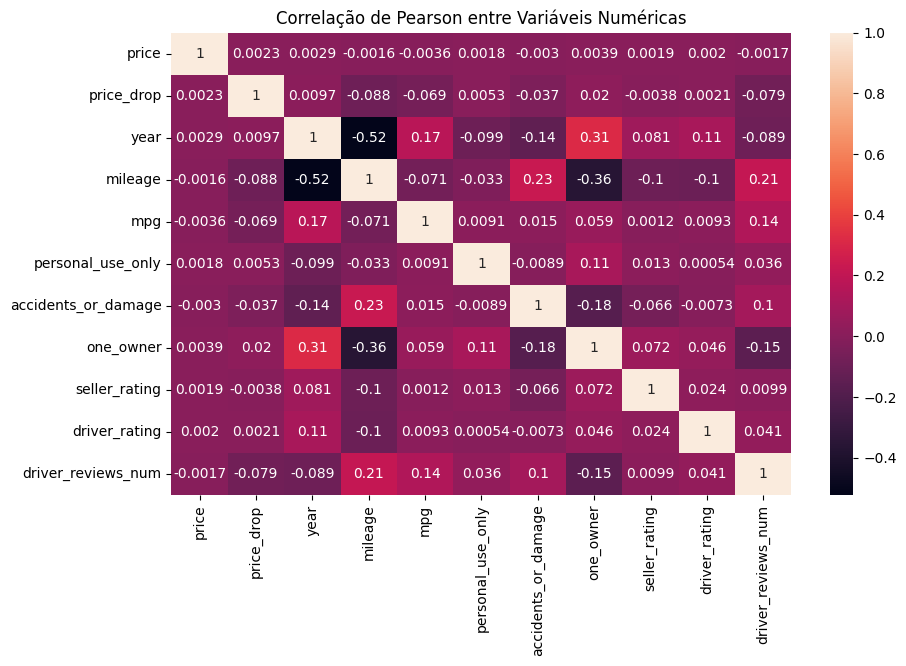

In [38]:
plt.figure(figsize=(10,6))
sns.heatmap(numerical_corr, annot=True);
plt.title("Correlação de Pearson entre Variáveis Numéricas")
plt.show()

O heatmap evidencia que existem correlações **positivas** que estão classificadas em **muito fracas** e **fracas**<br>
As correlações **negativas** se encontram em **fracas** e **moderadas**<br>

As correlações entre as variáveis podem estar tão baixas pois o **tratamento dos dados ainda não foi realizado**. Portanto, após o processamento, esse gráfico será plotado novamente para as diferenças serem visualizadas.

### year

In [39]:
sample['year'].value_counts()

year
2020    33498
2021    27138
2019    26347
2022    20036
2018    15729
        ...  
1948        1
1917        1
1937        1
1951        1
1946        1
Name: count, Length: 93, dtype: int64

In [40]:
sample['year'].min()

np.int64(1915)

Não faz sentido ter um carro do ano de **1915** no dataset.

In [41]:
sample['year'].max()

np.int64(2023)

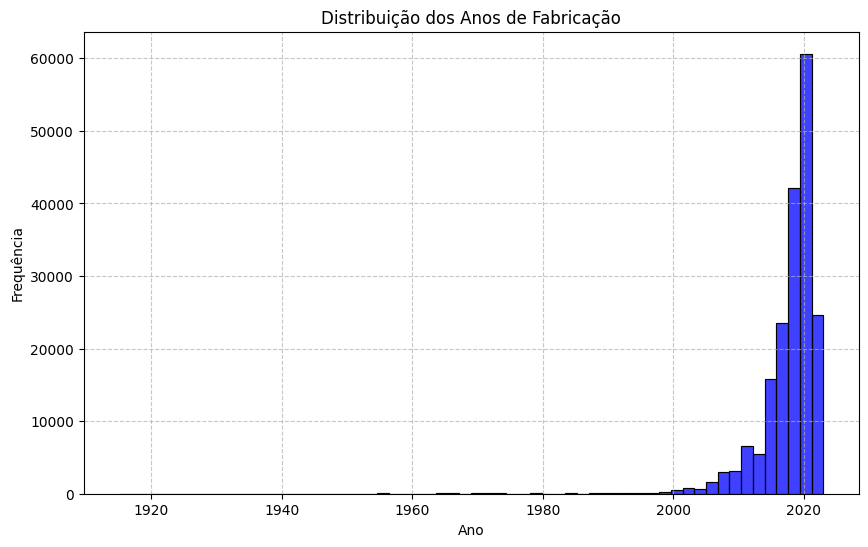

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(sample['year'], bins=60, kde=False, color='blue')
plt.title('Distribuição dos Anos de Fabricação')
plt.xlabel('Ano')
plt.ylabel('Frequência')
plt.grid(visible=True, linestyle="--", alpha=0.7)
plt.show()

Talvez seja interessante limitar o ano de fabricação de **2000 até 2023**

In [43]:
sample = sample[(sample['year'] >= 2000) & (sample['year'] <= 2023)]

In [44]:
sample.shape

(188466, 20)

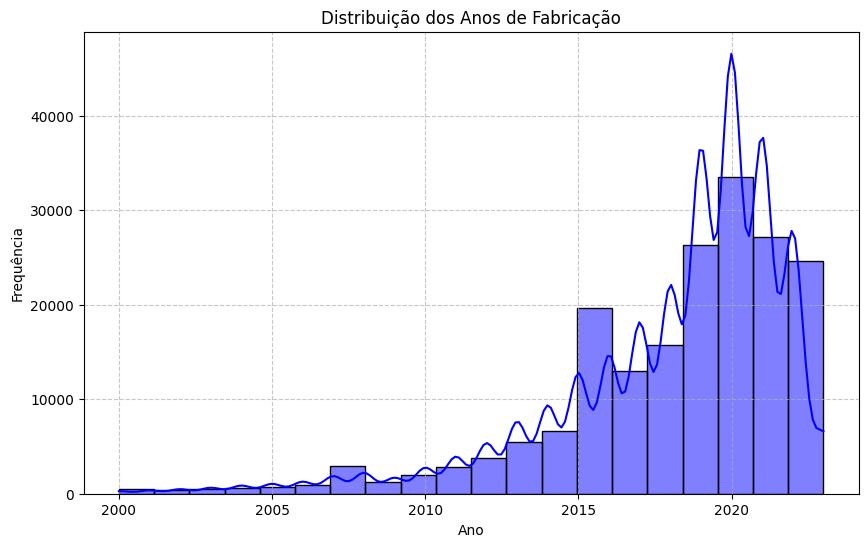

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(sample['year'], bins=20, kde=True, color='blue')
plt.title('Distribuição dos Anos de Fabricação')
plt.xlabel('Ano')
plt.ylabel('Frequência')
plt.grid(visible=True, linestyle="--", alpha=0.7)
plt.show()

O tratamento da variável *year* de forma manual permitiu a remoção de registros discrepantes que não acrescentariam na análise, além de evidenciar o **alto pico na distribuição no ano de 2020**, o que indica muitos carros foram fabricados nesse ano.

### price

É possível perceber que o **desvio padrão** está muito alto em relação à **média**, então a coluna *price* deve possuir **muitos outliers**

In [46]:
sample['price'].describe()

count    1.884660e+05
mean     3.781306e+04
std      2.303519e+06
min      1.000000e+00
25%      1.967500e+04
50%      2.799000e+04
75%      3.943700e+04
max      1.000000e+09
Name: price, dtype: float64

#### Método IQR

Este método tem como objetivo representar a amplitude do conjunto de dados de **forma central** por meio da distância entre o primeiro quartil(separa os 25% menores valores do restante dos dados) e o terceiro quartil(separa os 25% maiores valores do restante dos dados).

In [47]:
sample.shape

(188466, 20)

In [48]:
sample.describe()

,year,mileage,mpg,accidents_or_damage,one_owner,personal_use_only,seller_rating,driver_rating,driver_reviews_num,price_drop,price
count,188466.000000,1.884660e+05,188466.000000,188466.00000,188466.000000,188466.000000,188466.000000,188466.000000,188466.000000,188466.000000,1.884660e+05
mean,2018.067705,5.555846e+04,24.569976,0.22222,0.582890,0.666476,4.254026,4.627717,90.273004,837.274113,3.781306e+04
std,3.818919,4.322693e+04,5.810902,0.41574,0.493083,0.471473,0.701367,0.269512,115.298449,976.629237,2.303519e+06
min,2000.000000,0.000000e+00,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,0.000000,100.000000,1.000000e+00
25%,2016.000000,2.325425e+04,21.500000,0.00000,0.000000,0.000000,4.100000,4.500000,14.000000,571.250000,1.967500e+04
50%,2019.000000,4.552150e+04,24.000000,0.00000,1.000000,1.000000,4.500000,4.700000,51.000000,644.000000,2.799000e+04
75%,2021.000000,7.800000e+04,27.000000,0.00000,1.000000,1.000000,4.600000,4.800000,120.000000,750.000000,3.943700e+04
max,2023.000000,1.119067e+06,127.500000,1.00000,1.000000,1.000000,5.000000,5.000000,1025.000000,50004.000000,1.000000e+09


É possível observar extremos muito grandes no sample, por exemplo:<br>
min = 1.0<br>
max = 1000000000.0<br>
Isso significa que a coluna *price* está muito **desbalanceada**, o que pode afeta também no cálculo do IQR. Portanto, a ideia é remover os primeiros e últimos 15 registros, para que valores extremos afetem menos a sample.

In [49]:
sample_price = sample['price'].sort_values(ascending=True).tolist()
print("Lista de preços: ", sample_price)

Lista de preços:  [1.0, 289.0, 299.0, 299.0, 399.0, 399.0, 895.0, 995.0, 999.0, 1195.0, 1295.0, 1295.0, 1295.0, 1395.0, 1395.0, 1400.0, 1495.0, 1495.0, 1495.0, 1500.0, 1500.0, 1500.0, 1795.0, 1795.0, 1795.0, 1795.0, 1795.0, 1800.0, 1800.0, 1800.0, 1855.0, 1933.0, 1942.0, 1950.0, 1995.0, 1995.0, 1995.0, 1995.0, 1995.0, 1995.0, 1995.0, 1995.0, 1997.0, 1999.0, 1999.0, 1999.0, 1999.0, 1999.0, 2000.0, 2000.0, 2000.0, 2000.0, 2200.0, 2235.0, 2295.0, 2295.0, 2295.0, 2300.0, 2300.0, 2350.0, 2350.0, 2450.0, 2458.0, 2488.0, 2495.0, 2495.0, 2499.0, 2499.0, 2499.0, 2499.0, 2500.0, 2500.0, 2500.0, 2500.0, 2500.0, 2500.0, 2500.0, 2500.0, 2500.0, 2500.0, 2500.0, 2500.0, 2500.0, 2500.0, 2500.0, 2500.0, 2550.0, 2588.0, 2590.0, 2595.0, 2599.0, 2695.0, 2700.0, 2777.0, 2777.0, 2790.0, 2795.0, 2795.0, 2795.0, 2795.0, 2800.0, 2800.0, 2850.0, 2890.0, 2899.0, 2899.0, 2900.0, 2900.0, 2900.0, 2900.0, 2900.0, 2900.0, 2900.0, 2900.0, 2900.0, 2950.0, 2975.0, 2988.0, 2989.0, 2990.0, 2990.0, 2990.0, 2990.0, 2990.0, 

30 primeiros registros

In [50]:
for i in range(0, 14, 1):
    print(sample_price[i])

1.0
289.0
299.0
299.0
399.0
399.0
895.0
995.0
999.0
1195.0
1295.0
1295.0
1295.0
1395.0


30 últimos registros

In [51]:
for i in sample_price[-14:]:
    print(i)

529996.0
535000.0
550000.0
550000.0
559000.0
740000.0
1111111.0
1150000.0
1275000.0
1390000.0
1400000.0
1495000.0
1575000.0
1000000000.0


Removendo os **30 primeiros** e **30 últimos** registros de price

In [52]:
sample = sample[(sample['price'] > 1800) & (sample['price'] < 529996.0)]

In [53]:
sample['price'].min(), sample['price'].max()

(np.float64(1855.0), np.float64(515000.0))

Calculando os quartis

In [54]:
Q1_price = sample['price'].quantile(0.25)
Q3_price = sample['price'].quantile(0.75)

print("1ª Quartil: ", Q1_price)
print("3º Quartil: ", Q3_price)

1ª Quartil:  19685.25
3º Quartil:  39436.75


Calculando o IQR

In [55]:
IQR_price = Q3_price - Q1_price

print("IQR de price: ", IQR_price)

IQR de price:  19751.5


Os valores são considerados outliers se estiverem fora desse intervalo(limites):

Para **outliers inferiores**: Q1 − 1.5 * IQR<br>
Para **outliers superiores**: Q3 + 1.5 * IQR

In [56]:
lower_limit = Q1_price - (1.5 * IQR_price)
higher_limit = Q3_price + (1.5 * IQR_price)

print("Limite inferior: ", lower_limit)
print("Limite superior: ", higher_limit)

Limite inferior:  -9942.0
Limite superior:  69064.0


In [57]:
price_outliers = sample[(sample['price'] < lower_limit) | (sample['price'] > higher_limit)]

In [58]:
outlier_values = price_outliers['price'].sort_values().tolist()
print("Valores outliers:", outlier_values)

Valores outliers: [69100.0, 69111.0, 69112.0, 69115.0, 69125.0, 69140.0, 69173.0, 69184.0, 69190.0, 69190.0, 69190.0, 69191.0, 69200.0, 69206.0, 69206.0, 69206.0, 69210.0, 69215.0, 69233.0, 69256.0, 69259.0, 69280.0, 69280.0, 69287.0, 69290.0, 69291.0, 69307.0, 69308.0, 69323.0, 69366.0, 69370.0, 69371.0, 69376.0, 69376.0, 69383.0, 69383.0, 69385.0, 69390.0, 69393.0, 69400.0, 69400.0, 69410.0, 69420.0, 69421.0, 69434.0, 69435.0, 69436.0, 69437.0, 69446.0, 69451.0, 69457.0, 69462.0, 69477.0, 69478.0, 69481.0, 69490.0, 69492.0, 69493.0, 69494.0, 69495.0, 69495.0, 69495.0, 69495.0, 69495.0, 69495.0, 69496.0, 69497.0, 69498.0, 69499.0, 69500.0, 69500.0, 69500.0, 69500.0, 69500.0, 69500.0, 69500.0, 69500.0, 69500.0, 69500.0, 69500.0, 69500.0, 69500.0, 69500.0, 69500.0, 69500.0, 69500.0, 69500.0, 69500.0, 69500.0, 69500.0, 69511.0, 69518.0, 69520.0, 69521.0, 69523.0, 69533.0, 69534.0, 69545.0, 69550.0, 69555.0, 69557.0, 69571.0, 69573.0, 69575.0, 69577.0, 69580.0, 69581.0, 69586.0, 69588.0, 

In [59]:
len(outlier_values)

9089

In [60]:
sample = sample[(sample['price'] >= lower_limit) & (sample['price'] <= higher_limit)]

In [61]:
sample.shape

(179333, 20)

#### Boxplot

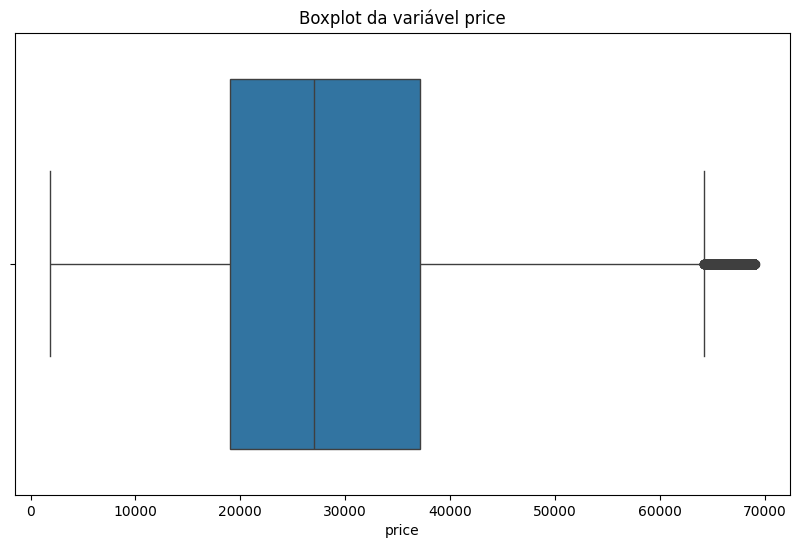

In [62]:
plt.figure(figsize=(10,6))
sns.boxplot(x=sample['price'])
plt.title('Boxplot da variável price')
plt.show()

In [63]:
sample['price'].max()

np.float64(69057.0)

In [64]:
print("Limite superior: ", higher_limit)

Limite superior:  69064.0


Pelo boxplot, é possível visualizar que a sample já não possui mais outliers na coluna *price*. O valor outlier que é mostrado após o valor máximo(69057.0), é limite superior(69064.0) definido do cálculo IQR.

#### Histograma

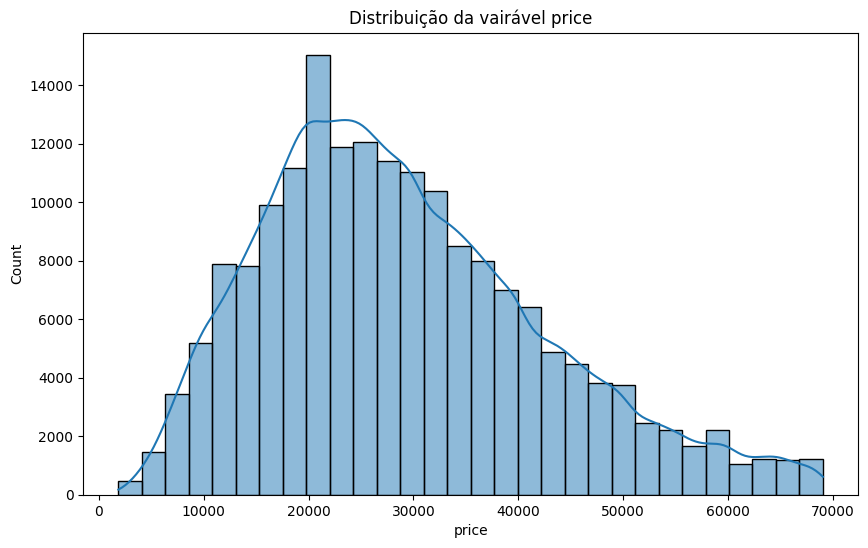

In [65]:
plt.figure(figsize=(10,6))
sns.histplot(sample['price'], kde=True, bins=30)
plt.title('Distribuição da vairável price')
plt.show()

O histograma mostra que mesmo após a remoção de outliers, há valores de price que são maiores, mas em menor quantidade.<br>
Além disso, o pico mais alto no histograma está em torno de 20.000, o que indica que existe uma maior quantidade de carros com esse valor na sample

#### Q-Q Plot

Verificando normalidade com o Q-Q Plot, pois a sample é muito grande

In [66]:
from scipy import stats

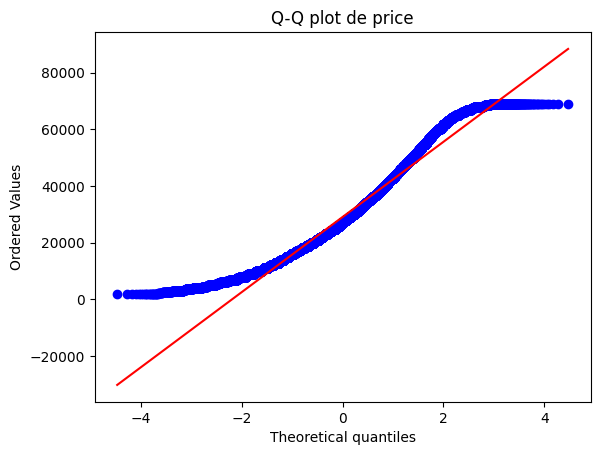

In [67]:
stats.probplot(sample['price'], dist="norm", plot=plt)
plt.title('Q-Q plot de price')
plt.show()

Tendo como base que a linha vermelha representa uma distribuição normal dos dados, é possível ver que ele **não segue uma distribuição normal de forma ideal**. <br>

Isso pode evidenciar valores um pouco mais extremos nas duas caudas, principalmente valores mais baixos de price que foram mantidos na sample.

### mileage

In [68]:
sample['mileage'].min()

np.float64(0.0)

In [69]:
zero_mileage_count = (sample['mileage'] == 0.0).sum()
print("Quantidade de valores 0.0 em mileage:", zero_mileage_count)

Quantidade de valores 0.0 em mileage: 269


Não faz sentido o carro ter **0.0 milhas percorridas**, se é um dataset de **carros usados**

Verificando os registros com **0.0 milhas percorridas**

In [70]:
zero_mileage_records = sample[sample['mileage'] <= 5.0]

In [71]:
zero_mileage_records.head(30)

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
375651,Jeep,Gladiator Rubicon,2023,2.0,3.6L V6 24V MPFI DOHC,6-Speed Manual,Four-wheel Drive,Gasoline,24.0,High Velocity Clearcoat,Black,0.0,1.0,1.0,Melton Sales,4.8,4.6,2.0,644.0,52823.0
34513,BMW,330 i xDrive,2022,0.0,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,All-wheel Drive,Gasoline,29.5,Alpine White,Canberra Beige,0.0,1.0,0.0,BMW of Alexandria,2.5,4.7,0.0,644.0,45923.0
41525,BMW,M Coupe,2000,0.0,3.2L I6 24V MPFI DOHC,5-Speed Manual,Rear-wheel Drive,Gasoline,22.5,Black,Not Informed,0.0,0.0,1.0,Beverly Hills Car Club,2.4,4.6,11.0,644.0,29950.0
389118,Jeep,Wrangler Unlimited Rubicon,2017,0.0,3.6L V6 24V MPFI DOHC,5-Speed Automatic,Four-wheel Drive,Gasoline,18.5,Gray,Black,0.0,0.0,1.0,Phil Long Ford of Denver,4.7,4.7,228.0,1000.0,40991.0
466334,Lexus,RX 450h,2022,5.0,3.5L V6 24V PDI DOHC Hybrid,Automatic CVT,All-wheel Drive,Hybrid,24.0,Nightfall Mica,Parchment,0.0,1.0,0.0,Lexus of Warwick,4.9,4.7,0.0,644.0,54030.0
418685,Kia,Optima Hybrid EX,2013,0.0,2.4L I4 16V MPFI DOHC Hybrid,6-Speed Automatic,Front-wheel Drive,Hybrid,37.0,Gray,Sand / Black,0.0,0.0,1.0,OnQ Auto Group Inc,1.5,4.5,37.0,644.0,12900.0
96669,Chevrolet,Suburban 1500 LT,2010,0.0,5.3L V8 16V MPFI OHV Flexible Fuel,6-Speed Automatic,Four-wheel Drive,E85 Flex Fuel,18.0,Red,Not Informed,0.0,0.0,0.0,Settle Auto Sales (Taylor Street),4.5,4.4,26.0,500.0,6799.0
38125,BMW,X1 sDrive28i,2021,0.0,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Front-wheel Drive,Gasoline,28.5,Alpine White,Mocha,0.0,0.0,0.0,BMW of Nashville,2.3,5.0,3.0,644.0,43641.0
528530,Mercedes-Benz,GLB 250 Base 4MATIC,2023,0.0,2.0L I4 16V GDI DOHC Turbo,8-Speed Manual,All-wheel Drive,Gasoline,24.0,Metallic,Black,0.0,1.0,1.0,Mercedes-Benz of Chantilly,4.6,5.0,2.0,644.0,49990.0
38908,BMW,X7 xDrive40i,2019,0.0,3.0L I6 24V GDI DOHC Turbo,8-Speed Automatic,All-wheel Drive,Gasoline,22.5,Black Sapphire Metallic,Tartufo,0.0,1.0,1.0,BMW of Lancaster,4.4,4.1,22.0,644.0,49000.0


Com essa visualização, foi possível constatar que são **registros anômalos**.<br>
Muitos desses carros com 0.0 milhas rodadas mostram que já **sofreram acidentes**, com a coluna *accidents_or_damage* = 1.0<br>

Porém, excluir esses registros não vai gerar muitos resultados ou impactar na nossa análise, então resolvi mantê-los para evitar que o dataset possa ficar enviesado.

### manufacturer

In [72]:
sample.dtypes

manufacturer            object
model                   object
year                     int64
mileage                float64
engine                  object
transmission            object
drivetrain              object
fuel_type               object
mpg                    float64
exterior_color          object
interior_color          object
accidents_or_damage    float64
one_owner              float64
personal_use_only      float64
seller_name             object
seller_rating          float64
driver_rating          float64
driver_reviews_num     float64
price_drop             float64
price                  float64
dtype: object

In [73]:
sample['manufacturer'].value_counts()

manufacturer
Ford             18672
Toyota           14648
Chevrolet        12932
Nissan           12122
Jeep             10076
Honda             9236
Kia               8861
Mercedes-Benz     8579
BMW               8510
GMC               6419
Subaru            6076
Volkswagen        5996
Dodge             5902
Hyundai           5550
Lexus             5212
RAM               4411
Audi              4277
Cadillac          3947
Mazda             3836
Buick             3601
INFINITI          3138
Chrysler          3091
Volvo             2452
Lincoln           2413
Land Rover        2412
Acura             2088
Porsche           1409
Mitsubishi        1398
Tesla             1270
Jaguar             799
Name: count, dtype: int64

Visualizando o carro mais caro

In [74]:
most_expensive_car = sample[sample['price'] == sample['price'].max()]
most_expensive_car

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
525283,Mercedes-Benz,E-Class E 450 4MATIC,2021,23789.0,3.0L I6 24V GDI DOHC Turbo,9-Speed Automatic,All-wheel Drive,Gasoline,25.0,Graphite Gray Metallic,Not Informed,0.0,1.0,0.0,Mercedes-Benz of Manchester,4.4,4.7,7.0,2932.0,69057.0


Visualizando o carro mais barato

In [75]:
cheapest_car = sample[sample['price'] == sample['price'].min()]
cheapest_car

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
126494,Chevrolet,Express 2500 Cargo,2001,193950.0,5.7L V8 16V MPFI OHV,4-Speed Automatic,Rear-wheel Drive,Gasoline,24.0,Victory Red,Dark Pewter,1.0,0.0,1.0,Auto's of Chicago,4.2,4.0,1.0,644.0,1855.0


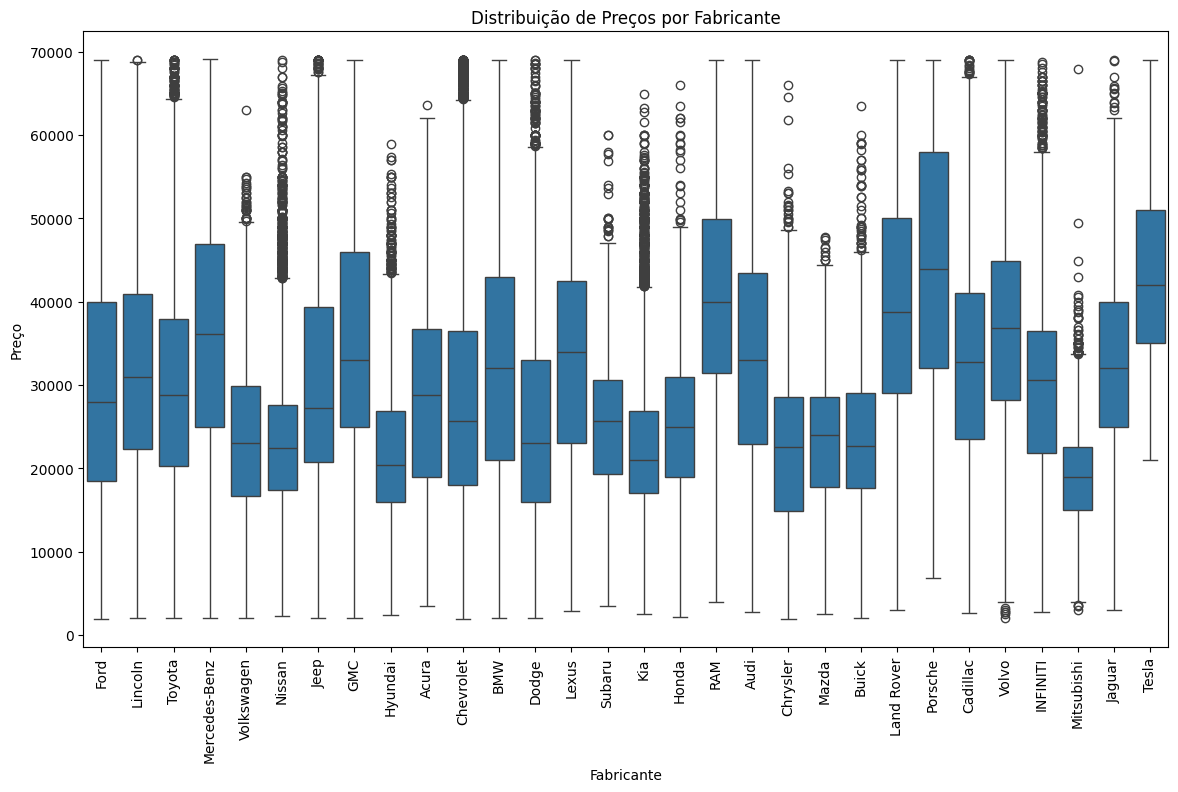

In [76]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='manufacturer', y='price', data=sample)
plt.xticks(rotation=90)
plt.title('Distribuição de Preços por Fabricante')
plt.ylabel('Preço')
plt.xlabel('Fabricante')
plt.show()

### fueltype

In [77]:
fueltype_counts = sample['fuel_type'].value_counts()
fueltype_counts

fuel_type
Gasoline                         153428
Hybrid                             7054
Diesel                             5343
Not Informed                       4930
E85 Flex Fuel                      4576
Electric                           3446
B                                   330
Flexible Fuel                       117
Plug-In Hybrid                       22
Gasoline/Mild Electric Hybrid        21
Gasoline Fuel                        20
G                                    12
Premium Unleaded                     11
Regular Unleaded                     10
Compressed Natural Gas                5
PHEV                                  1
Diesel Fuel                           1
Hybrid Fuel                           1
Premium                               1
Other                                 1
Premium (Required)                    1
E85 Fl                                1
Biodiesel                             1
Name: count, dtype: int64

In [78]:
sample['fuel_type'].nunique()

23

Com essa quantidade de tipos de combustíveis com poucas ocorrências, é possível agrupá-los em um único tipo, como **'Outros'**<br>
Por exemplo, a partir do combustível *B*

In [79]:
small_categories = fueltype_counts[fueltype_counts <= 330].index
small_categories

Index(['B', 'Flexible Fuel', 'Plug-In Hybrid', 'Gasoline/Mild Electric Hybrid',
       'Gasoline Fuel', 'G', 'Premium Unleaded', 'Regular Unleaded',
       'Compressed Natural Gas', 'PHEV', 'Diesel Fuel', 'Hybrid Fuel',
       'Premium', 'Other', 'Premium (Required)', 'E85 Fl', 'Biodiesel'],
      dtype='object', name='fuel_type')

In [80]:
def replace_fuel_type(value):
    if value in small_categories:
        return 'Other'  
    else:
        return value  

sample['fuel_type'] = sample['fuel_type'].apply(replace_fuel_type)

In [81]:
sample['fuel_type'].value_counts()

fuel_type
Gasoline         153428
Hybrid             7054
Diesel             5343
Not Informed       4930
E85 Flex Fuel      4576
Electric           3446
Other               556
Name: count, dtype: int64

### drivetrain

In [82]:
drivetrain_counts = sample['drivetrain'].value_counts()
drivetrain_counts

drivetrain
Front-wheel Drive                                              60114
All-wheel Drive                                                54339
Four-wheel Drive                                               35234
Rear-wheel Drive                                               21905
Not Informed                                                    4385
FWD                                                             1565
AWD                                                              854
4WD                                                              409
RWD                                                              403
All-Wheel Drive                                                   29
Front-Wheel Drive                                                 22
Front-Wheel Drive with Limited-Slip Differential                  11
Four-Wheel Drive with Locking and Limited-Slip Differential       11
Unknown                                                            9
All-Wheel Drive with Lo

In [83]:
small_categories = drivetrain_counts[drivetrain_counts <= 29].index
small_categories

Index(['All-Wheel Drive', 'Front-Wheel Drive',
       'Front-Wheel Drive with Limited-Slip Differential',
       'Four-Wheel Drive with Locking and Limited-Slip Differential',
       'Unknown', 'All-Wheel Drive with Locking and Limited-Slip Differential',
       'Rear-Wheel Drive', 'Four-Wheel Drive', 'Front Wheel Drive',
       'Rear-Wheel Drive with Limited-Slip Differential', 'All Wheel Drive',
       'Four Wheel Drive', '4x4', 'Rear Wheel Drive',
       'Engine: 2.4L GDI DOHC 16V I4 -inc: dual CVVT',
       'All-Wheel Drive with Locking Differential',
       'Four-Wheel Drive with Locking Differential'],
      dtype='object', name='drivetrain')

In [84]:
def replace_drivetrain(value):
    if value in small_categories:
        return 'Other'  
    else:
        return value  

sample['drivetrain'] = sample['drivetrain'].apply(replace_drivetrain)

In [85]:
sample['drivetrain'].value_counts()

drivetrain
Front-wheel Drive    60114
All-wheel Drive      54339
Four-wheel Drive     35234
Rear-wheel Drive     21905
Not Informed          4385
FWD                   1565
AWD                    854
4WD                    409
RWD                    403
Other                  125
Name: count, dtype: int64

### engine

In [86]:
sample['engine'].value_counts()

engine
2.0L I4 16V GDI DOHC Turbo                                          18741
3.6L V6 24V MPFI DOHC                                                8605
3.6L V6 24V GDI DOHC                                                 6788
2.0L I4 16V MPFI DOHC                                                4942
1.5L I4 16V GDI DOHC Turbo                                           4526
                                                                    ...  
Engine, 3.6L Variable Valve Timing V6 DI Direct Injection (304 h        1
3.5L V6 ECOBOOST ENGINE                                                 1
3.5L ECOBOOST                                                           1
4.6L V8 16V MPFI OHV                                                    1
Turbocharged Gas I4 1.5L/                                               1
Name: count, Length: 3220, dtype: int64

In [87]:
for x in sample['engine'].value_counts():
    print(x)

18741
8605
6788
4942
4526
4373
4320
3791
3407
3241
3186
3124
2820
2522
2377
2316
2247
2236
2202
2159
2032
1932
1807
1775
1774
1660
1655
1628
1432
1419
1300
1283
1281
1281
1226
1221
1134
1130
1100
1056
1053
1051
1051
997
989
978
967
958
945
931
900
885
841
741
710
702
629
623
596
595
562
558
528
526
470
454
449
441
437
405
395
384
384
378
360
349
344
329
324
322
321
311
294
291
283
282
281
281
279
276
274
262
261
252
244
243
233
228
225
220
219
217
216
212
211
209
205
203
191
190
189
188
178
175
174
171
170
169
168
166
162
159
157
152
147
139
139
138
131
127
126
126
125
125
123
122
122
121
121
119
119
119
118
117
116
114
114
114
114
111
110
110
110
109
109
108
108
107
107
107
106
105
105
104
104
100
100
99
99
99
98
95
94
93
93
92
92
91
90
87
86
85
85
85
85
83
83
82
82
82
79
78
77
77
77
77
77
76
76
75
75
75
74
73
72
72
70
70
69
68
68
68
68
67
67
67
66
65
64
64
64
64
63
63
63
62
62
61
60
60
60
58
58
57
57
57
57
56
56
56
56
55
55
55
55
55
55
55
54
53
53
53
53
53
52
52
52
51
51
50
50
50
50


### transmission

In [88]:
sample['transmission'].value_counts()

transmission
6-Speed Automatic                              36599
8-Speed Automatic                              33311
Automatic CVT                                  27288
Automatic                                      21547
9-Speed Automatic                              14597
                                               ...  
7 Speed PDK                                        1
Automatic, 6-Spd w/Dual-Clutch & Sportmatic        1
ECVT (Continuously Variable)                       1
1-SPEED G                                          1
4-Speed Automatic with Sportshift Manual 4A        1
Name: count, Length: 522, dtype: int64

In [89]:
sample['transmission'].nunique()

522

In [90]:
for x in sample['transmission'].value_counts():
    print(x)

36599
33311
27288
21547
14597
8220
5751
4479
3424
3303
3069
2717
2049
1508
911
790
736
718
628
598
287
245
217
212
211
198
197
188
154
149
137
135
130
126
121
111
104
94
94
85
81
79
77
75
75
72
69
65
63
62
61
61
60
59
58
58
55
54
54
50
49
48
47
47
46
44
42
41
40
40
39
38
37
36
36
36
33
33
32
32
30
29
29
27
27
25
25
24
24
23
21
21
21
21
19
19
18
18
18
17
17
17
17
17
17
17
16
16
16
16
15
15
15
15
15
14
14
14
14
13
13
13
13
13
13
13
13
13
12
12
12
11
11
10
10
10
10
9
9
9
9
9
9
9
9
9
9
8
8
7
7
7
7
7
7
7
7
7
6
6
6
6
6
6
6
6
6
6
6
6
6
5
5
5
5
5
5
5
5
5
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1

### model

In [91]:
sample['model'].value_counts()

model
Fusion SE              766
Sportage LX            762
Corolla LE             758
GLC 300 Base 4MATIC    694
Rogue SV               675
                      ... 
F-PACE P340 S            1
Sienna XLE Premiu        1
STS AWD w/1SB            1
Pilot AWD Sport          1
Panamera RWD             1
Name: count, Length: 7038, dtype: int64

### exterior_color

In [92]:
sample['exterior_color'].value_counts()

exterior_color
Black                        13684
White                        11846
Gray                          7250
Silver                        5884
Blue                          4164
                             ...  
Tuscan Bronze ChromaFlair        1
GY                               1
Magnetic Red Ii Metallic         1
Sparkling Ruby                   1
Ice Wine                         1
Name: count, Length: 4272, dtype: int64

In [93]:
for x in sample['exterior_color'].value_counts().index:
    print(x)

Black
White
Gray
Silver
Blue
Summit White
Red
Bright White Clearcoat
Not Informed
Gun Metallic
Oxford White
Granite Crystal Clearcoat Metallic
Alpine White
Polar White
Billet Silver Metallic Clearcoat
Pure White
Silver Ice Metallic
Satin Steel Metallic
Crystal Black Pearl
Shadow Black
Crystal White Pearl
Black Sapphire Metallic
Ice Silver Metallic
Black Clearcoat
Brilliant Silver Metallic
Platinum White Pearl
Modern Steel Metallic
Diamond Black
Super White
Onyx Black
Snow White Pearl
Magnetic Gray Metallic
Midnight Black Metallic
Ebony Twilight Metallic
Deep Black Pearl Effect
Platinum Gray Metallic
Glacier White
Mosaic Black Metallic
Lunar Silver Metallic
Super Black
Crystal Black Silica
Fuji White
Quicksilver Metallic
Jet Black
Magnetic Black
Brilliant Black Crystal Pearlcoat
Magnetic Metallic
Magnetite Gray Metallic
Jet Black Mica
Black Obsidian
Agate Black Metallic
Santorini Black
Graphite Shadow
Blizzard Pearl
White Knuckle Clearcoat
Ebony Black
Velvet Red Pearlcoat
Glacier White 

In [94]:
for x in sample['exterior_color'].value_counts():
    print(x)

13684
11846
7250
5884
4164
3886
3499
3240
2046
1985
1985
1477
1269
1246
1240
1143
1109
1027
1017
1000
987
978
966
934
934
921
920
907
901
887
884
880
828
821
794
790
724
722
721
696
689
653
649
648
645
614
607
598
560
557
514
513
504
502
494
492
481
479
464
459
458
454
448
448
445
435
435
434
430
425
424
422
419
415
410
403
393
384
381
372
370
362
357
356
356
355
350
348
342
332
328
326
315
309
304
303
302
298
296
288
286
286
284
283
281
278
276
276
275
275
272
272
270
269
266
263
259
258
253
247
241
240
237
236
235
232
226
223
223
223
222
222
222
221
220
219
217
217
216
216
214
214
212
209
206
205
205
203
203
202
201
201
200
199
199
191
191
189
188
187
186
185
184
183
182
181
179
178
177
176
174
173
171
170
170
167
166
165
164
164
163
163
161
160
160
159
158
158
157
156
154
153
153
152
152
151
151
148
145
144
144
143
142
142
141
140
140
140
136
134
134
133
132
132
131
130
129
128
127
125
125
124
124
123
121
120
118
117
117
116
116
115
115
115
115
115
114
114
113
112
112
111
110
110
11

#### Agrupando as cores primárias

Uma abordagem que eu resolvi adotar para as cores externas do carro, foi agrupar várias categorias relacionadas às suas cores primárias.

Visualizando as cores presentes na sample, constatei que as principais são essas:<br>
**Black, White, Gray, Blue, Red, Silver, Grey e Gold**<br>

As cores que não se encaixam em nenhuma das categorias acima, serão **'Other'**

In [95]:
main_colors = ['Black', 'White', 'Gray', 'Silver', 'Blue', 'Red', 'Gold', 'Grey', 'Green']

def replace_exterior_color(value):
    for color in main_colors:
        if color.lower() in value.lower():
            return color;
    return 'Other'

sample['exterior_color'] = sample['exterior_color'].apply(replace_exterior_color)

In [96]:
sample['exterior_color'].value_counts()

exterior_color
White     41749
Black     37379
Other     27080
Silver    22017
Gray      19006
Blue      16090
Red       13249
Green      1412
Grey        808
Gold        543
Name: count, dtype: int64

### interior color

In [97]:
sample['interior_color'].value_counts()

interior_color
Black                              67442
Not Informed                       13318
Gray                               12039
Jet Black                          10521
Ebony                               9019
                                   ...  
Rc20                                   1
Black / Arras Red                      1
Ebony/Dark Titanium                    1
Tupelo Black                           1
Canyon / Black / Charcoal Black        1
Name: count, Length: 2349, dtype: int64

In [98]:
for x in sample['interior_color'].value_counts():
    print(x)

67442
13318
12039
10521
9019
6608
3704
3619
2317
2130
1622
1054
920
894
836
834
776
677
645
641
577
559
544
490
473
458
448
442
428
406
400
394
393
382
380
374
355
350
344
339
336
330
327
321
293
292
288
282
277
277
276
271
268
257
256
250
245
234
233
233
233
200
199
198
195
189
187
184
182
178
177
171
169
168
162
159
156
155
154
153
151
151
151
150
145
144
142
141
139
137
137
132
131
130
129
128
128
127
124
124
121
121
120
120
119
118
116
116
114
114
112
109
105
104
102
98
98
95
95
95
95
95
94
92
89
89
89
89
88
86
86
85
85
85
83
83
82
81
81
79
79
78
78
78
77
74
73
72
72
72
71
71
70
70
68
67
67
67
66
65
65
64
64
64
62
62
62
62
62
61
61
61
61
61
60
59
59
58
57
57
56
56
56
55
55
55
55
55
55
54
54
54
53
53
53
52
51
50
50
50
50
49
49
48
48
48
46
45
45
45
45
44
44
44
44
43
42
42
42
42
42
41
41
41
40
40
40
40
40
40
39
39
39
39
39
39
38
38
38
38
38
37
37
37
36
36
36
36
36
36
36
36
36
36
35
35
35
34
33
33
33
33
32
31
31
31
31
31
31
31
31
30
30
30
30
30
30
30
30
29
29
29
29
29
29
29
28
28
28
27

In [99]:
for x in sample['interior_color'].value_counts().index:
    print(x)

Black
Not Informed
Gray
Jet Black
Ebony
Charcoal
Graphite
Beige
Titan Black
Tan
Charcoal Black
Ivory
Diesel Gray / Black
Ash
Red
Parchment
Brown
Light Gray
Ebony Black
Wheat
Dark Slate Gray
Medium Earth Gray
Ebony / Ebony
Medium Light Stone
Dark Gray
Global Black
Cognac
Black / Graphite
Macchiato Beige
Dark Galvanized
Black / Light Graystone
Black Onyx
Medium Pewter
Sport
Sandstone
Cappuccino
White
Satin Black
Almond
Steel
Blond
Black / Red
Silk Beige / Black
Cocoa / Dune
Cashmere
Canberra Beige
Mocha
BLACK
Cream
Medium Ash Gray
Light Neutral
Medium Stone
Cement
Cocoa
Shale
Stone
Taupe
Pewter
Dune
Sand
Dark Charcoal
Jet Black / Dark Ash
Black MB-Tex
Shara Beige
Black / Gray
Rioja Red
Camel
Okapi Brown
Dark Palazzo Gray
Ruby Red
Espresso
Ivory White
Sand Beige
Silk Beige
Java Brown
Diesel Gray/Black
Cirrus
Bisque
Dark Earth Gray
Dark Ash
Java
Black Graphite
Off Black
Saddle Brown
Gray / Black
Dark Atmosphere
Oyster
Dark Walnut
Light Platinum / Jet Black
Rock Gray
Light Titanium
Whisper 

Como a variável interior_color tem **'Not Informed'** como segunda categoria mais frequente, resolvi não utilizá-la na minha análise, pois acredito que ela será pouco relevante para prever o preço.

In [100]:
sample = sample.drop(columns=['interior_color'])
sample.columns

Index(['manufacturer', 'model', 'year', 'mileage', 'engine', 'transmission',
       'drivetrain', 'fuel_type', 'mpg', 'exterior_color',
       'accidents_or_damage', 'one_owner', 'personal_use_only', 'seller_name',
       'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop',
       'price'],
      dtype='object')

### seller_name

seller_name é uma coluna que não terá nenhuma influência no preço, então podemos excluí-la.

In [101]:
sample = sample.drop(columns=['seller_name'])
sample.columns

Index(['manufacturer', 'model', 'year', 'mileage', 'engine', 'transmission',
       'drivetrain', 'fuel_type', 'mpg', 'exterior_color',
       'accidents_or_damage', 'one_owner', 'personal_use_only',
       'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop',
       'price'],
      dtype='object')

## Processamento e transformação

### Correlação de Pearson

In [102]:
from scipy.stats import pearsonr

In [103]:
for col in numerical_vars.columns:
    corr, p_value = pearsonr(sample[col], sample['price'])
    print(f"Correlação entre {col} e price: \nCorrelação: {corr:.2f}\np-value: {p_value:.5f}")
    print("\n")

Correlação entre price e price: 
Correlação: 1.00
p-value: 0.00000


Correlação entre price_drop e price: 
Correlação: 0.14
p-value: 0.00000


Correlação entre year e price: 
Correlação: 0.59
p-value: 0.00000


Correlação entre mileage e price: 
Correlação: -0.57
p-value: 0.00000


Correlação entre mpg e price: 
Correlação: -0.26
p-value: 0.00000


Correlação entre personal_use_only e price: 
Correlação: -0.01
p-value: 0.00236


Correlação entre accidents_or_damage e price: 
Correlação: -0.21
p-value: 0.00000


Correlação entre one_owner e price: 
Correlação: 0.29
p-value: 0.00000


Correlação entre seller_rating e price: 
Correlação: 0.09
p-value: 0.00000


Correlação entre driver_rating e price: 
Correlação: 0.09
p-value: 0.00000


Correlação entre driver_reviews_num e price: 
Correlação: -0.31
p-value: 0.00000




In [104]:
numerical_sample_vars = sample.select_dtypes(include='number')

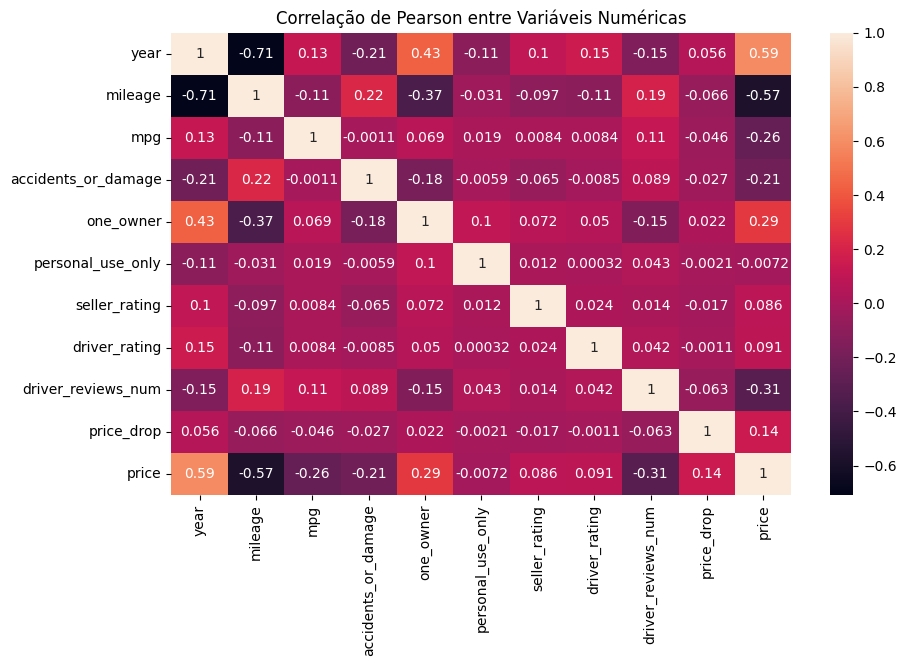

In [105]:
plt.figure(figsize=(10,6))
sns.heatmap(numerical_sample_vars.corr(method='pearson'), annot=True);
plt.title("Correlação de Pearson entre Variáveis Numéricas")
plt.show()

Comparando a diferença dos valores da Correlação de Pearson desse heatmap acima, com o heatmap plotado antes do tratamento das variáveis. É notório que tanto as **correlações positivas**, quanto **negativas** melhoraram.

### Correlação de Spearman

O objetivo na utilização da Correlação de Spearman é verificar quais **variáveis múmericas** serão interessantes de se manter para a realização do treinamento.

A correlação de Spearman é muito adequada, pois ela apenas avalia se as variáveis seguem um padrão de ordem (monotonia) e pode ser usada mesmo quando os dados **não são normalmente distribuídos**, o que se encaixa neste caso.

In [106]:
from scipy.stats import spearmanr

In [107]:
numerical_vars

,price,price_drop,year,mileage,mpg,personal_use_only,accidents_or_damage,one_owner,seller_rating,driver_rating,driver_reviews_num
191809,10994.0,590.0,2018,94746.0,29.5,1.0,0.0,1.0,4.3,4.6,202.0
488330,17498.0,500.0,2014,55710.0,27.5,1.0,0.0,0.0,3.8,4.7,69.0
713389,42995.0,644.0,2022,15022.0,24.0,1.0,0.0,1.0,4.5,4.8,13.0
531766,17995.0,505.0,2014,78600.0,23.5,0.0,0.0,0.0,4.4,4.7,100.0
216502,63999.0,644.0,2017,70365.0,24.0,1.0,0.0,1.0,4.6,4.6,163.0
...,...,...,...,...,...,...,...,...,...,...,...
489863,32000.0,500.0,2021,22369.0,25.0,0.0,0.0,1.0,4.9,4.8,9.0
513217,32217.0,644.0,2020,51915.0,24.5,1.0,0.0,1.0,4.8,4.8,36.0
59014,40000.0,644.0,2021,41279.0,24.0,0.0,0.0,0.0,4.5,4.7,29.0
314423,23892.0,253.0,2021,16722.0,29.0,1.0,1.0,1.0,4.5,4.7,45.0


Verificando a **Correlação de Spearman** para variáveis numéricas

In [108]:
for col in numerical_vars.columns:
    corr, p_value = spearmanr(sample[col], sample['price'])
    print(f"Correlação entre {col} e price: \nCorrelação: {corr:.2f}\np-value: {p_value:.5f}")
    print("\n")

Correlação entre price e price: 
Correlação: 1.00
p-value: 0.00000


Correlação entre price_drop e price: 
Correlação: 0.11
p-value: 0.00000


Correlação entre year e price: 
Correlação: 0.65
p-value: 0.00000


Correlação entre mileage e price: 
Correlação: -0.63
p-value: 0.00000


Correlação entre mpg e price: 
Correlação: -0.29
p-value: 0.00000


Correlação entre personal_use_only e price: 
Correlação: -0.01
p-value: 0.01870


Correlação entre accidents_or_damage e price: 
Correlação: -0.23
p-value: 0.00000


Correlação entre one_owner e price: 
Correlação: 0.32
p-value: 0.00000


Correlação entre seller_rating e price: 
Correlação: 0.10
p-value: 0.00000


Correlação entre driver_rating e price: 
Correlação: 0.22
p-value: 0.00000


Correlação entre driver_reviews_num e price: 
Correlação: -0.45
p-value: 0.00000




Com esse resultado é importante analisar os 2 fatores, tanto a **correlação** encontrada, quanto o **p-value**<br>

A correlação de uma variável ser negativa, indica que à medida que a variável aumenta, o preço tende a diminuir.<br>
A correlação de uma variável ser positiva, indica que à medida que uma variável aumenta, o preço tende a aumentar.

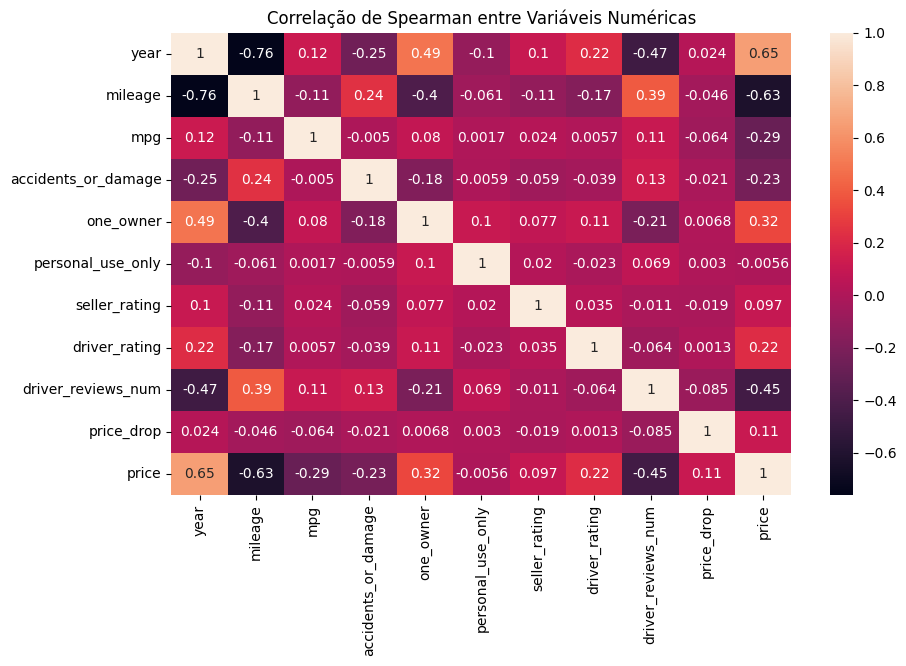

In [109]:
plt.figure(figsize=(10,6))
sns.heatmap(numerical_sample_vars.corr(method='spearman'), annot=True);
plt.title("Correlação de Spearman entre Variáveis Numéricas")
plt.show()

Pela Correlação de Spearman ser mais adequada para bases que não seguem um padrão normal, ela obteve melhores correlações entre as variáveis se comparada com a Correlação de Pearson.

### Transformação de variáveis categóricas

A ideia, é realizar o **Target Encoding** para transformar as variáveis categóricas mantidas na sample para variáveis numéricas.

O **Target Encoding** é uma excelente alternativa ao uso do **One Hot Encoding** no contexto em que estamos trabalhando, pois ele evitará que uma grande quantidade de colunas sejam criadas devido a quantidade de categorias presentes nas variáveis de estudo.<br>

O **Target Encoding** consiste em substituir as classes da feature pela média de seu alvo.

In [110]:
categorical_columns = sample.select_dtypes(include='object').columns
print('Variáveis categóricas:')
print(categorical_columns)

Variáveis categóricas:
Index(['manufacturer', 'model', 'engine', 'transmission', 'drivetrain',
       'fuel_type', 'exterior_color'],
      dtype='object')


#### Aplicando o Target Encoding

Os parâmetros smoothing e min_samples_leaf foram aplicados.<br>

**smoothing** serve para ajudar a regular o equilíbrio entre a média global e a média da categoria. Isso porque, valores mais baixos dão mais pesos as categorias, já valores altos aumentam o peso da média global, o que ajuda a regularizar categorias com menos dados.

O **min_samples_leaf** define o número mínimo de amostras necessárias em uma categoria para que a média da categoria tenha mais peso.

In [111]:
#considerar dropar variáveis que possuem muitos valores nulos lá no início.
#considerar a utilização de target encoding
#utilizar o random forest para 
#regressão linear multipla/polinomial
#tunning hiperparâmetros

In [112]:
from category_encoders import TargetEncoder

In [113]:
y = sample['price']

for col in categorical_columns:
    TE = TargetEncoder(
        smoothing=10,
        min_samples_leaf=15
    )
    X = sample[col]
    sample[col] = TE.fit_transform(X, y)

In [114]:
sample.head()

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,accidents_or_damage,one_owner,personal_use_only,seller_rating,driver_rating,driver_reviews_num,price_drop,price
191809,30413.641067,11998.150047,2018,94746.0,11789.822785,16359.151857,21441.101374,20955.679414,29.5,29926.224966,0.0,1.0,1.0,4.3,4.6,202.0,590.0,10994.0
488330,32504.913386,13977.382901,2014,55710.0,31967.885598,24272.156753,21441.101374,28402.166045,27.5,31204.842990,0.0,0.0,1.0,3.8,4.7,69.0,500.0,17498.0
713389,29417.694771,35628.639322,2022,15022.0,36904.078488,31952.960191,36872.129304,32971.528777,24.0,26312.646410,0.0,1.0,1.0,4.5,4.8,13.0,644.0,42995.0
531766,36203.529549,27795.817402,2014,78600.0,27178.062980,30351.337727,31337.986989,28402.166045,23.5,29926.224966,0.0,0.0,0.0,4.4,4.7,100.0,505.0,17995.0
216502,30413.641067,56319.186868,2017,70365.0,52115.540622,24272.156753,36723.810921,44992.245181,24.0,28627.132386,0.0,1.0,1.0,4.6,4.6,163.0,644.0,63999.0


In [115]:
sample.dtypes

manufacturer           float64
model                  float64
year                     int64
mileage                float64
engine                 float64
transmission           float64
drivetrain             float64
fuel_type              float64
mpg                    float64
exterior_color         float64
accidents_or_damage    float64
one_owner              float64
personal_use_only      float64
seller_rating          float64
driver_rating          float64
driver_reviews_num     float64
price_drop             float64
price                  float64
dtype: object

### Verificando importância de variáveis com o Random Forest 

O RandomForest atribui importância á variáveis através da **diminuição do Gini impurity score**, que mede o quanto cada variável contribui para reduzir a impureza ao longo das divisões das árvores.

In [116]:
from sklearn.ensemble import RandomForestRegressor

In [117]:
sample_copy = sample.copy()
X = sample_copy.drop(columns=['price'])
y = sample['price']

rf = RandomForestRegressor(n_estimators=100,
                           random_state=1)

In [118]:
rf.fit(X, y)

RandomForestRegressor(random_state=1)

In [119]:
importances = rf.feature_importances_
importances

array([0.01149538, 0.64541023, 0.10607842, 0.10173275, 0.04418587,
       0.00642565, 0.00627964, 0.00310083, 0.01366008, 0.00386697,
       0.00140836, 0.00109232, 0.00118732, 0.00626029, 0.00874688,
       0.03382096, 0.00524805])

In [120]:
X.columns

Index(['manufacturer', 'model', 'year', 'mileage', 'engine', 'transmission',
       'drivetrain', 'fuel_type', 'mpg', 'exterior_color',
       'accidents_or_damage', 'one_owner', 'personal_use_only',
       'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop'],
      dtype='object')

Criando um dataframe com as **Features** e as **Importances** obtidas no treinamento

In [121]:
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

In [122]:
importances_df

,Feature,Importance
0,manufacturer,0.011495
1,model,0.645410
2,year,0.106078
3,mileage,0.101733
4,engine,0.044186
5,transmission,0.006426
6,drivetrain,0.006280
7,fuel_type,0.003101
8,mpg,0.013660
9,exterior_color,0.003867


In [123]:
importances_df = importances_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

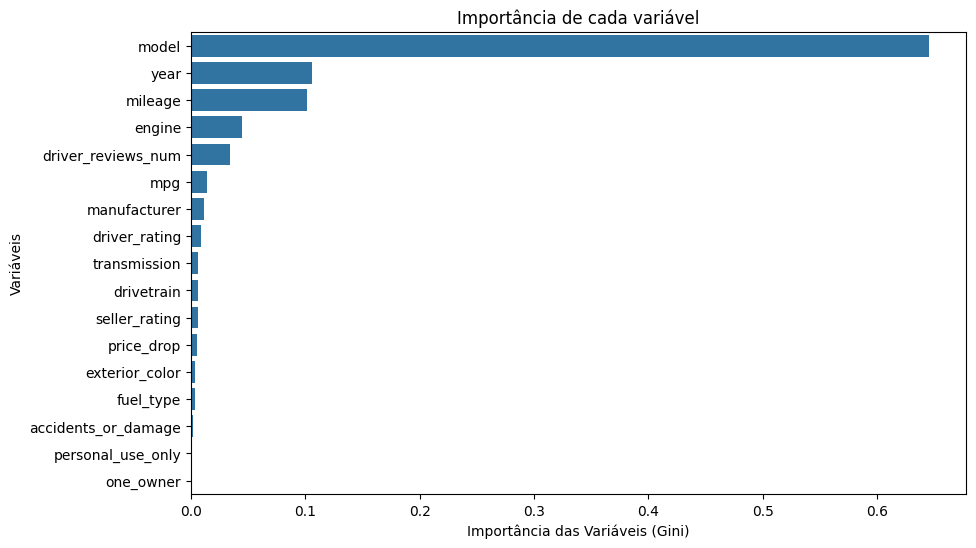

In [124]:
plt.figure(figsize=(10, 6))
sns.barplot(data=importances_df, x='Importance', y='Feature')
plt.xlabel("Importância das Variáveis (Gini)")
plt.ylabel("Variáveis")
plt.title("Importância de cada variável")
plt.show()

É possível visualizar através do gráfico que existem diferentes níveis de importância das variáveis, sendo a variável *model* disparada a com maior importância.<br>

Observa-se que muitas variáveis possuem um nível de importância muito baixo também. Portanto, resolvi adotar como critério utilizar apenas as variáveis com o **nível de importância maior que 0.02**. Isso para reduzir a dimensionalidade e complexidade do modelo, além de melhorar sua interpretabilidade.

In [125]:
selected_vars = importances_df[importances_df['Importance'] >= 0.02]

Variáveis que usaremos como **preditoras** no treinamento do modelo

In [126]:
selected_vars

,Feature,Importance
0,model,0.645410
1,year,0.106078
2,mileage,0.101733
3,engine,0.044186
4,driver_reviews_num,0.033821


# Criação dos modelos de regressão

## Dividindo a sample em treino e teste

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
X = sample[['model', 'year', 'mileage', 'engine', 'driver_reviews_num']]
y = sample['price']

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Tamanho de **X_train** e **X_test**

In [130]:
X_train.shape, X_test.shape

((125533, 5), (53800, 5))

Tamanho de **y_train** e **y_test**

In [131]:
y_train.shape, y_test.shape

((125533,), (53800,))

## Normalizando os dados

Fazendo a normalização após a divisão dos dados para evitar leak de dados sobre o conjunto de testes para o conjunto de treinamento. Dessa forma, evita-se resultados irreais no treinamento do modelo.

### Utilizando o Min-Max Scaler

O Min-Max atua sobre as colunas que estamos pré-processando. Ele dimensiona o conjunto de dados de modo que todos os valores de recursos estejam no **intervalo [0, 1]**.<br>

Por debaixo dos panos, ele basicamente funciona subtraindo o valor em questão pelo **menor valor da coluna** e então divide pela diferença entre o **valor máximo e mínimo**.

Como ele é uma técnica que funciona melhor em **distribuições não normais**, escolhi utilizá-lo ao invés do StandardScaler.

In [132]:
from sklearn.preprocessing import MinMaxScaler

In [133]:
mm_scaler = MinMaxScaler()

Escalando **X_train** e **X_test** com MinMaxScaler

In [134]:
X_train_mm_scaler = mm_scaler.fit_transform(X_train)

In [135]:
X_train_mm_scaler

array([[0.15953754, 0.73913043, 0.0501516 , 0.2119556 , 0.06536585],
       [0.6153805 , 0.95652174, 0.00787442, 0.54796435, 0.00292683],
       [0.14937204, 0.60869565, 0.10559868, 0.64950686, 0.06731707],
       ...,
       [0.50201171, 0.91304348, 0.02009442, 0.4666408 , 0.02829268],
       [0.03419785, 0.7826087 , 0.07510989, 0.31842113, 0.19707317],
       [0.16971116, 0.73913043, 0.05281989, 0.1923172 , 0.74634146]],
      shape=(125533, 5))

In [136]:
X_test_mm_scaler = mm_scaler.fit_transform(X_test)

In [137]:
X_test_mm_scaler

array([[0.26648358, 0.95652174, 0.03391249, 0.29644761, 0.01073171],
       [0.28814881, 0.65217391, 0.07910266, 0.23922777, 0.0097561 ],
       [0.18991717, 0.65217391, 0.13718035, 0.52218611, 0.02536585],
       ...,
       [0.0709819 , 0.73913043, 0.21308805, 0.11761758, 0.44878049],
       [0.62654108, 0.86956522, 0.05400721, 0.57828059, 0.02243902],
       [0.17428627, 0.86956522, 0.03351356, 0.23922777, 0.04390244]],
      shape=(53800, 5))

### Utilizando o StandardScaler

In [138]:
from sklearn.preprocessing import StandardScaler

In [139]:
sc_scaler = StandardScaler()

Escalando **X_train** e **X_test** com StandardScaler

In [140]:
X_train_sc_scaler = sc_scaler.fit_transform(X_train)
X_test_sc_scaler = sc_scaler.fit_transform(X_test)

In [141]:
X_train_sc_scaler

array([[-1.09709558, -0.24450874, -0.03340019, -1.18119461, -0.23602982],
       [ 1.47349714,  1.06416587, -1.126327  ,  0.75559653, -0.78151492],
       [-1.15442096, -1.02971351,  1.39998773,  1.34089868, -0.21898341],
       ...,
       [ 0.8341871 ,  0.80243095, -0.81042215,  0.28683873, -0.5599116 ],
       [-1.80391203,  0.01722618,  0.61180803, -0.56751566,  0.9146028 ],
       [-1.03972441, -0.24450874,  0.03557911, -1.29439252,  5.71316701]],
      shape=(125533, 5))

In [142]:
X_test_sc_scaler

array([[-0.49631367,  1.06498348, -0.88895127, -0.70002024, -0.71884823],
       [-0.37414794, -0.76795581, -0.29385366, -1.03122271, -0.72754896],
       [-0.92805573, -0.76795581,  0.47095638,  0.60660963, -0.58833736],
       ...,
       [-1.59870691, -0.24425887,  1.47056509, -1.73513235,  3.18777726],
       [ 1.53397564,  0.54128654, -0.62432914,  0.93129824, -0.61443953],
       [-1.01619512,  0.54128654, -0.89420466, -1.03122271, -0.42302359]],
      shape=(53800, 5))

## Treinando o Random Forest

### Sem scaler

In [143]:
rf2 = RandomForestRegressor(n_estimators=100, random_state=1, verbose=1)

In [144]:
rf2.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   19.6s


RandomForestRegressor(random_state=1, verbose=1)

In [145]:
y_pred = rf2.predict(X_test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.9s


In [146]:
y_pred

array([24320.84, 18145.45, 25043.42, ..., 12520.11, 51157.05, 20531.8 ],
      shape=(53800,))

In [147]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [148]:
mae = mean_absolute_error(y_test, y_pred)
print("MAE: {:.3f}".format(mae))

MAE: 2461.398


In [149]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("MSE: {:.3f}".format(mse))
print("RMSE: {:.3f}".format(rmse))

MSE: 12491272.880
RMSE: 3534.299


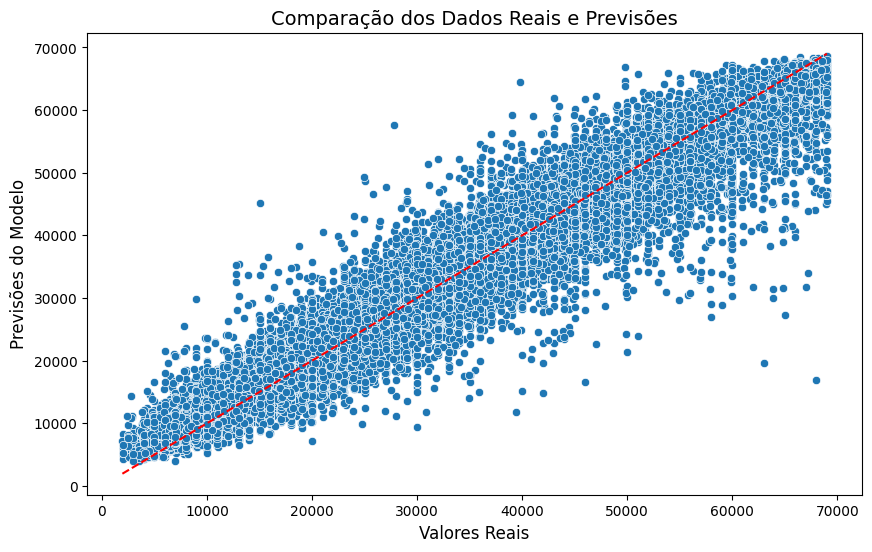

In [150]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

plt.title('Comparação dos Dados Reais e Previsões', fontsize=14)
plt.xlabel('Valores Reais', fontsize=12)
plt.ylabel('Previsões do Modelo', fontsize=12)
plt.show()

A linha vermelha tracejada indica um cenário onde os valores reais são iguais às previsões.<br>
Os pontos azuis representam as previsões, portanto se os pontos se dispersarem muito da reta, indica que as previsões estão distantes dos valores reais. Pontos próximos à reta indicam previsões corretas.

### Utilizando Min-Max Scaler

In [151]:
rf3 = RandomForestRegressor(n_estimators=100, random_state=1, verbose=1)

In [152]:
rf3.fit(X_train_mm_scaler, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   19.5s


RandomForestRegressor(random_state=1, verbose=1)

In [153]:
y_pred2 = rf3.predict(X_test_mm_scaler)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.7s


In [154]:
y_pred2

array([24619.63, 16155.44, 18408.06, ...,  7760.31, 44632.48, 20279.27],
      shape=(53800,))

In [155]:
mae = mean_absolute_error(y_test, y_pred2)
print("MAE: {:.3f}".format(mae))

MAE: 4370.146


In [156]:
mse = mean_squared_error(y_test, y_pred2)
rmse = mse ** 0.5
print("MSE: {:.3f}".format(mse))
print("RMSE: {:.3f}".format(rmse))

MSE: 33278726.457
RMSE: 5768.772


### Utilizando o Standard Scaler

In [157]:
rf4 = RandomForestRegressor(n_estimators=100, random_state=1, verbose=1)

In [158]:
rf4.fit(X_train_sc_scaler, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   19.7s


RandomForestRegressor(random_state=1, verbose=1)

In [159]:
y_pred3 = rf4.predict(X_test_sc_scaler)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.9s


In [160]:
y_pred3

array([24580.75, 18186.78, 24945.9 , ..., 12549.19, 51136.95, 21977.4 ],
      shape=(53800,))

In [161]:
mae = mean_absolute_error(y_test, y_pred3)
print("MAE: {:.3f}".format(mae))

MAE: 2678.485


In [162]:
mse = mean_squared_error(y_test, y_pred3)
rmse = mse ** 0.5
print("MSE: {:.3f}".format(mse))
print("RMSE: {:.3f}".format(rmse))

MSE: 14678449.168
RMSE: 3831.246


### Treinando o XGBoost

In [163]:
from xgboost import XGBRegressor

In [164]:
xgboost = XGBRegressor(    n_estimators=100,  # Número de árvores
    learning_rate=0.1,  # Taxa de aprendizado
    max_depth=6,  # Profundidade máxima das árvores
    verbosity=1,  # Mostra logs do treinamento
    random_state=421)

In [165]:
xgboost.fit(X_train, y_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=421, ...)

In [166]:
import sklearn